# DDGun
## process DDGun3D

In [1]:
import pandas
import numpy
from copy import deepcopy

In [2]:
foldx_df = pandas.read_csv("Ssym+_experimental.csv", index_col=0)#,usecols=['Protein', 'Mut_pdb','DDG_dir','DDG_inv','FoldX_dir','FoldX_inv']) #.drop(["Unnamed: 0","guess"], axis=1)
display(foldx_df.head())
print(foldx_df.columns)

,Protein,Mut_pdb,DDG_dir,DDG_inv,MAESTRO_dir,MAESTRO_inv,FoldX_dir,FoldX_inv,PremPS_dir,PremPS_inv,...,Mut_pdb_inv,Mut_Seq_inv,INPS3D_dir,INPS3D_inv,INPS-Seq_dir,INPS-Seq_inv,ThermoNet_dir,ThermoNet_inv,Dynamut2_dir,Dynamut2_inv
0,1amqA,C191F,-1.60,1.60,-1.290230,-2.330405,-3.458090,-1.167050,-0.70,0.83,...,F191C,F180C,-2.370220,-0.632415,-1.029200,0.505217,0.3728,-1.0064,-1.34,-2.07
1,1amqA,C191S,-1.90,1.90,-2.040645,-1.579652,0.178326,-0.117104,-1.84,1.72,...,S191C,S180C,-1.444290,-0.174529,-0.132376,0.166903,-0.0194,0.0058,-2.18,-1.60
2,1amqA,C191W,-3.90,3.90,-1.387711,-2.306045,-6.466620,-1.234990,-1.29,1.64,...,W191C,W180C,-1.855400,-1.200120,0.041922,-0.245567,0.4185,-0.0369,-1.75,-1.75
3,1amqA,C191Y,-2.30,2.30,-1.467389,-2.086929,-1.795960,0.509656,-0.76,1.66,...,Y191C,Y180C,-1.419390,-1.665550,0.069468,-0.166052,1.2850,-0.8779,-1.23,-1.24
4,1arrA,P8L,2.49,-2.49,0.427826,-0.487971,-0.710842,-5.194210,-0.13,0.31,...,L8P,L3P,-0.534797,0.027555,-0.858790,0.083820,1.0747,-0.1365,-0.73,-0.46


Index(['Protein', 'Mut_pdb', 'DDG_dir', 'DDG_inv', 'MAESTRO_dir',
       'MAESTRO_inv', 'FoldX_dir', 'FoldX_inv', 'PremPS_dir', 'PremPS_inv',
       'Dynamut_dir', 'Dynamut_inv', 'mCSM_dir', 'mCSM_inv', 'SDM_dir',
       'SDM_inv', 'DUET_dir', 'DUET_inv', 'I-Mutant3.0_dir', 'I-Mutant3.0_inv',
       'I-Mutant3.0-Seq_dir', 'I-Mutant3.0-Seq_inv', 'MUpro_dir', 'MUpro_inv',
       'SAAFEC-SEQ_dir', 'SAAFEC-SEQ_inv', 'ACDC-NN_dir', 'ACDC-NN_inv',
       'ACDC-NN-2str_dir', 'ACDC-NN-2str_inv', 'ACDC-NN-Seq_dir',
       'ACDC-NN-Seq_inv', 'PoPMuSiC_dir', 'PoPMuSiC_inv', 'DDGun3D_dir',
       'DDGun3D_inv', 'DDGun_dir', 'DDGun_inv', 'DDG', 'Ph', 'T', 'Mut_Seq',
       'Protein_inv', 'Mut_pdb_inv', 'Mut_Seq_inv', 'INPS3D_dir', 'INPS3D_inv',
       'INPS-Seq_dir', 'INPS-Seq_inv', 'ThermoNet_dir', 'ThermoNet_inv',
       'Dynamut2_dir', 'Dynamut2_inv'],
      dtype='object')


In [3]:
foldx_df = pandas.read_csv("Ssym+_experimental.csv", index_col=0,usecols=['Protein', 'Mut_pdb','Mut_pdb_inv','DDG_dir','DDG_inv','DDGun3D_dir','DDGun3D_inv','DDGun3D_dir', 'DDGun3D_inv']) #.drop(["Unnamed: 0","guess"], axis=1)
foldx_df

,Mut_pdb,DDG_dir,DDG_inv,DDGun3D_dir,DDGun3D_inv,Mut_pdb_inv
Protein,,,,,,
1amqA,C191F,-1.60,1.60,0.9,-1.0,F191C
1amqA,C191S,-1.90,1.90,-0.5,0.4,S191C
1amqA,C191W,-3.90,3.90,1.0,-1.1,W191C
1amqA,C191Y,-2.30,2.30,1.3,-1.4,Y191C
1arrA,P8L,2.49,-2.49,0.1,-0.1,L8P
...,...,...,...,...,...,...
5ptiA,F22A,-1.20,1.20,-2.5,2.8,A22F
5ptiA,F45A,-6.90,6.90,-4.4,3.7,A45F
5ptiA,N43G,-5.70,5.70,-1.9,1.5,G43N


In [4]:
_dir=foldx_df.iloc[:,[0,1,3]].rename({'Mut_pdb': 'mut','DDG_dir': 'ddg','DDGun3D_dir':'ddgun'},axis=1)
_dir.head()

,mut,ddg,ddgun
Protein,,,
1amqA,C191F,-1.60,0.9
1amqA,C191S,-1.90,-0.5
1amqA,C191W,-3.90,1.0
1amqA,C191Y,-2.30,1.3
1arrA,P8L,2.49,0.1


In [5]:
_dir[['ddg','ddgun']].corr()

,ddg,ddgun
ddg,1.000000,0.583802
ddgun,0.583802,1.000000


In [6]:
_inv=foldx_df.iloc[:,[-1,2,-2]].rename({'Mut_pdb_inv': 'mut','DDG_inv': 'ddg','DDGun3D_inv':'ddgun'},axis=1)
_inv.head()

,mut,ddg,ddgun
Protein,,,
1amqA,F191C,1.60,-1.0
1amqA,S191C,1.90,0.4
1amqA,W191C,3.90,-1.1
1amqA,Y191C,2.30,-1.4
1arrA,L8P,-2.49,-0.1


In [7]:
foldx_train=pandas.concat([_dir,_inv])
foldx_train.shape

(704, 3)

,ddg,ddgun
ddg,1.000000,0.661139
ddgun,0.661139,1.000000


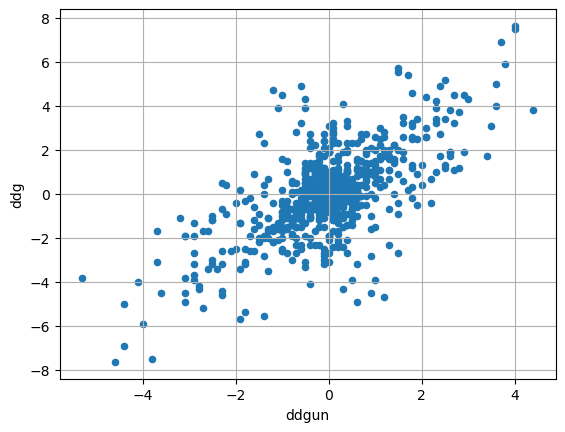

In [8]:
plain_foldx_plot= foldx_train.plot.scatter(x="ddgun", y="ddg", grid=True)
foldx_train[['ddg','ddgun']].corr()

## ddFEP

In [9]:
import math
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
aa_labels = [
    "A",
    "R",
    "N",
    "D",
    "C",
    "Q",
    "E",
    "G",
    "H",
    "I",
    "L",
    "K",
    "M",
    "F",
    "P",
    "S",
    "T",
    "W",
    "Y",
    "V",
]

In [11]:
def expand_mut(x):
    x["from_aa"] = x["mut"][0]
    x["position"] = x["mut"][1:-1]
    x["to_aa"] = x["mut"][-1]
    return x

In [12]:
ddfep_opt =foldx_train.apply(expand_mut, axis=1)

In [13]:
#ddfep_opt = deepcopy(foldx_train)
for _ in sorted(aa_labels):
    ddfep_opt[_] = 0
ddfep_opt

,mut,ddg,ddgun,from_aa,position,to_aa,A,C,D,E,...,M,N,P,Q,R,S,T,V,W,Y
Protein,,,,,,,,,,,,,,,,,,,,,
1amqA,C191F,-1.60,0.9,C,191,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191S,-1.90,-0.5,C,191,S,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191W,-3.90,1.0,C,191,W,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1amqA,C191Y,-2.30,1.3,C,191,Y,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1arrA,P8L,2.49,0.1,P,8,L,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5ptiA,A22F,1.20,2.8,A,22,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ptiA,A45F,6.90,3.7,A,45,F,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5ptiA,G43N,5.70,1.5,G,43,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [15]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')
ddgun_train=deepcopy(ddfep_opt)

In [16]:
### fit test

In [17]:
X_optfep= ddfep_opt[['ddgun']+sorted(aa_labels)].to_numpy()
y=ddfep_opt['ddg'].to_numpy()
X_optfep.shape, y.shape

((704, 21), (704,))

In [18]:
dd_optfep_model = LinearRegression(fit_intercept=True).fit(
    X_optfep,
    y,
)

In [19]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([ 1.31418732,  0.37072437,  1.01324592,  0.01773425,  0.5047126 ,
        -0.71965677,  0.69848708, -0.97710599, -0.19610568,  0.56650461,
        -0.38651002,  0.01900693,  0.54055412,  0.06866567,  0.4507035 ,
         1.34698975,  0.34066699,  0.63997347, -0.17001065, -3.60865381,
        -0.51992633]),
 0.027627801584482102,
 0.7397989735428644)

In [20]:
ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)

RMSE: 1.3201068980725443


,ddg,ddfep_opt
ddg,1.000000,0.739799
ddfep_opt,0.739799,1.000000


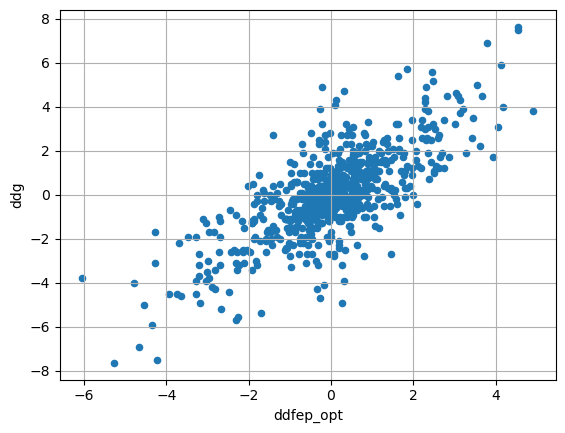

In [21]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

print('RMSE:',math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt'])))
ddfep_opt[['ddg','ddfep_opt']].corr()

### Crossvalidate

In [22]:
optfep_rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.59058098, 0.27358583, 0.66005899, 0.53767113, 0.44528281,
       0.49349114, 0.51386389, 0.47061588, 0.47034637, 0.55066447,
       0.39231492, 0.50047844, 0.45549129, 0.50258906, 0.63164773,
       0.49336303, 0.45092351, 0.49360293, 0.5711106 , 0.52808122,
       0.33521659, 0.48262404, 0.57909438, 0.43800186, 0.62562588,
       0.59841164, 0.56324214, 0.44721466, 0.46766131, 0.4697186 ,
       0.51041811, 0.40164849, 0.48388484, 0.56926953, 0.631975  ,
       0.53728922, 0.46544737, 0.55493548, 0.33521021, 0.62662794,
       0.55327678, 0.48423079, 0.55121919, 0.39706455, 0.53990421,
       0.60726939, 0.3226403 , 0.4096284 , 0.58691773, 0.55216287])

In [23]:
_r=numpy.sqrt(optfep_rsq)
_r.mean(), _r.std()

(0.7065220627587915, 0.062437883790731646)

## Test on S669

In [24]:
_669_foldx = pandas.read_csv(
    "Data_s669_with_predictions.csv",
    index_col=None,
    usecols=["Protein", "PDB_Mut", "DDGun3D_dir", "DDGun3D_inv","DDG_checked_dir", "DDG_checked_inv"],
)
_669_foldx["hash"] = _669_foldx.apply(
    lambda x: "_".join([x["Protein"], x["PDB_Mut"]]), axis=1
)
_669_foldx['experimental']=True
_669_foldx
# list(_669_foldx.columns)

,Protein,PDB_Mut,DDG_checked_dir,DDGun3D_dir,DDG_checked_inv,DDGun3D_inv,hash,experimental
0,1A0FA,S11A,-1.800,0.5,1.800,-0.5,1A0FA_S11A,True
1,1A7VA,A104H,-2.690,-0.1,2.690,0.1,1A7VA_A104H,True
2,1A7VA,A66H,-1.980,0.5,1.980,-0.5,1A7VA_A66H,True
3,1A7VA,A91H,-1.700,-0.1,1.700,0.1,1A7VA_A91H,True
4,1A7VA,D3H,-1.360,0.2,1.360,-0.2,1A7VA_D3H,True
...,...,...,...,...,...,...,...,...
664,5JXBA,D329P,-1.440,-0.2,1.440,0.0,5JXBA_D329P,True
665,5OAQA,Y429H,-2.990,-2.4,2.990,2.4,5OAQA_Y429H,True
666,5VP3A,R39K,0.413,-1.0,-0.413,1.0,5VP3A_R39K,True
667,5VP3A,S128G,-0.378,-0.8,0.378,0.8,5VP3A_S128G,True


In [25]:
_461_muts = pandas.read_csv("s461_muts.csv", sep=" ")

s461_hashes = set(_461_muts.apply(lambda x: "_".join([x["pdb"], x["mut"]]), axis=1))
_461_muts.head()

,pdb,mut,ddg
0,1A0FA,S11A,-1.800
1,1BA3A,H461D,-1.745
2,1BA3A,H489D,0.287
3,1BA3A,H489K,-0.287
4,1BA3A,H489M,-0.263


In [26]:
_669_foldx['s461']=_669_foldx.apply( lambda x: x['hash'] in s461_hashes, axis=1)
#_669_foldx['FoldX_inv'] = - _669_foldx['FoldX_inv']
_669_foldx.head()

,Protein,PDB_Mut,DDG_checked_dir,DDGun3D_dir,DDG_checked_inv,DDGun3D_inv,hash,experimental,s461
0,1A0FA,S11A,-1.80,0.5,1.80,-0.5,1A0FA_S11A,True,True
1,1A7VA,A104H,-2.69,-0.1,2.69,0.1,1A7VA_A104H,True,False
2,1A7VA,A66H,-1.98,0.5,1.98,-0.5,1A7VA_A66H,True,False
3,1A7VA,A91H,-1.70,-0.1,1.70,0.1,1A7VA_A91H,True,False
4,1A7VA,D3H,-1.36,0.2,1.36,-0.2,1A7VA_D3H,True,False


In [27]:
_669_foldx['revmut']=_669_foldx['PDB_Mut'].apply(lambda x: ''.join([x[-1],x[1:-1],x[0]]))
_669_foldx.head()

,Protein,PDB_Mut,DDG_checked_dir,DDGun3D_dir,DDG_checked_inv,DDGun3D_inv,hash,experimental,s461,revmut
0,1A0FA,S11A,-1.80,0.5,1.80,-0.5,1A0FA_S11A,True,True,A11S
1,1A7VA,A104H,-2.69,-0.1,2.69,0.1,1A7VA_A104H,True,False,H104A
2,1A7VA,A66H,-1.98,0.5,1.98,-0.5,1A7VA_A66H,True,False,H66A
3,1A7VA,A91H,-1.70,-0.1,1.70,0.1,1A7VA_A91H,True,False,H91A
4,1A7VA,D3H,-1.36,0.2,1.36,-0.2,1A7VA_D3H,True,False,H3D


In [28]:
def unpack_mut_code(mut_label):
    "convert mut_label field to my expanded format"
    x["from_aa"] = x[mut_label][0]
    x["to_aa"] = x[mut_label][-1]
    x["position"] = int(x[mut_label][1:-1])
    return x

In [29]:
_669_dir=_669_foldx.iloc[:,[0,1,2,3,-3,-2]].rename({'PDB_Mut': 'mut','DDG_checked_dir': 'ddg','DDGun3D_dir':'ddgun'},axis=1).apply(expand_mut, axis=1)
_669_dir.head()

,Protein,mut,ddg,ddgun,experimental,s461,from_aa,position,to_aa
0,1A0FA,S11A,-1.80,0.5,True,True,S,11,A
1,1A7VA,A104H,-2.69,-0.1,True,False,A,104,H
2,1A7VA,A66H,-1.98,0.5,True,False,A,66,H
3,1A7VA,A91H,-1.70,-0.1,True,False,A,91,H
4,1A7VA,D3H,-1.36,0.2,True,False,D,3,H


In [30]:
_669_dir[['ddg','ddgun']].corr()

,ddg,ddgun
ddg,1.000000,0.432432
ddgun,0.432432,1.000000


In [31]:
_669_inv=_669_foldx.iloc[:,[0,4,5,-3,-2,-1]].rename({'revmut': 'mut','DDG_checked_inv': 'ddg','DDGun3D_inv':'ddgun'},axis=1).apply(expand_mut, axis=1)
_669_inv['experimental']= False
_669_inv.head()

,Protein,ddg,ddgun,experimental,s461,mut,from_aa,position,to_aa
0,1A0FA,1.80,-0.5,False,True,A11S,A,11,S
1,1A7VA,2.69,0.1,False,False,H104A,H,104,A
2,1A7VA,1.98,-0.5,False,False,H66A,H,66,A
3,1A7VA,1.70,0.1,False,False,H91A,H,91,A
4,1A7VA,1.36,-0.2,False,False,H3D,H,3,D


In [32]:
_669_inv[['ddg','ddgun']].corr()

,ddg,ddgun
ddg,1.000000,0.410487
ddgun,0.410487,1.000000


In [33]:
_669_full=pandas.concat([_669_dir,_669_inv], ignore_index=True)
_669_full.shape

(1338, 9)

In [34]:
_669_full[['ddg','ddgun']].corr()

,ddg,ddgun
ddg,1.000000,0.568375
ddgun,0.568375,1.000000


RMSE: 1.6077944571577132


,ddg,ddgun
ddg,1.000000,0.568375
ddgun,0.568375,1.000000


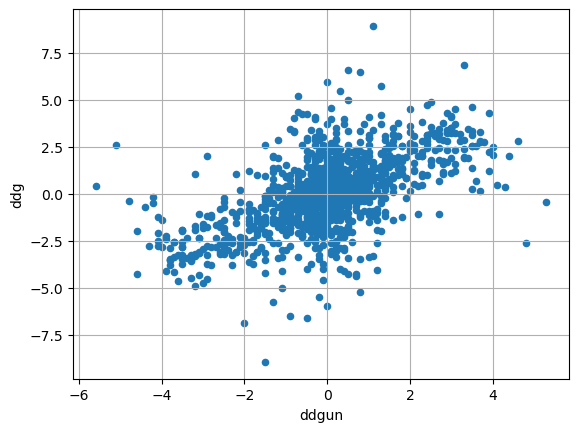

In [35]:
_669_full_clean = _669_full.dropna()
foldx_669_plot = _669_full_clean.plot.scatter(x="ddgun", y="ddg", grid=True)

print("RMSE:", math.sqrt(mean_squared_error(_669_full_clean["ddg"], _669_full_clean["ddgun"])))
_669_full_clean[['ddg','ddgun']].corr()

In [36]:
## Go ddMBC
foldx_s669=deepcopy(_669_full_clean)

In [37]:
for _ in sorted(aa_labels):
    foldx_s669[_]=0
foldx_s669=foldx_s669.apply(encode_mutation, axis=1)

In [38]:
X669_optfep= foldx_s669[['ddgun']+sorted(aa_labels)].to_numpy()
X669_optfep.shape

(1336, 21)

In [39]:
foldx_s669['ddfep_opt']=dd_optfep_model.predict(X669_optfep)

RMSE: 1.841308060987704


,ddg,ddfep_opt
ddg,1.000000,0.498425
ddfep_opt,0.498425,1.000000


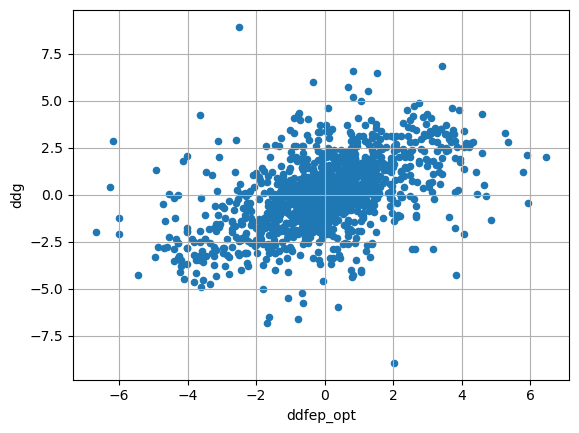

In [40]:
foldx_s669_plot = foldx_s669.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
print('RMSE:',math.sqrt(mean_squared_error(foldx_s669['ddg'],foldx_s669['ddfep_opt'])))
foldx_s669[['ddg','ddfep_opt']].corr()

In [41]:
foldx_s669[foldx_s669['experimental'] == True][['ddg','ddgun','ddfep_opt']].corr()

,ddg,ddgun,ddfep_opt
ddg,1.000000,0.432432,0.356820
ddgun,0.432432,1.000000,0.797502
ddfep_opt,0.356820,0.797502,1.000000


In [42]:
sum(foldx_s669['experimental'])

667

In [43]:
foldx_s669[foldx_s669['experimental'] == False][['ddg','ddgun','ddfep_opt']].corr()

,ddg,ddgun,ddfep_opt
ddg,1.000000,0.410487,0.322392
ddgun,0.410487,1.000000,0.783197
ddfep_opt,0.322392,0.783197,1.000000


## S461

In [44]:
foldx_s461=deepcopy(foldx_s669[ foldx_s669['s461']])
foldx_s461.shape

(922, 30)

In [45]:
print('RMSE ddgun:',math.sqrt(mean_squared_error(foldx_s461['ddg'],foldx_s461['ddgun'])))

RMSE ddgun: 1.1730279421843863


RMSE ddgun/ddMBC: 1.4062759617697762


,ddg,ddgun,ddfep_opt
ddg,1.000000,0.743125,0.680026
ddgun,0.743125,1.000000,0.907091
ddfep_opt,0.680026,0.907091,1.000000


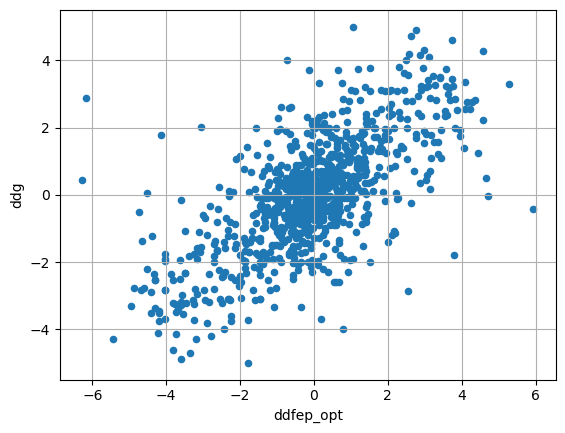

In [46]:
foldx_s461_plot = foldx_s461.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
print('RMSE ddgun/ddMBC:',math.sqrt(mean_squared_error(foldx_s461['ddg'],foldx_s461['ddfep_opt'])))
foldx_s461[['ddg','ddgun','ddfep_opt']].corr()

In [47]:
foldx_s461[foldx_s461['experimental'] == True][['ddg','ddgun','ddfep_opt']].corr()

,ddg,ddgun,ddfep_opt
ddg,1.000000,0.619281,0.545315
ddgun,0.619281,1.000000,0.872044
ddfep_opt,0.545315,0.872044,1.000000


In [48]:
sum(foldx_s461['experimental'])

461

In [49]:
foldx_s461[foldx_s461['experimental'] == False][['ddg','ddgun','ddfep_opt']].corr()

,ddg,ddgun,ddfep_opt
ddg,1.000000,0.572336,0.477806
ddgun,0.572336,1.000000,0.860034
ddfep_opt,0.477806,0.860034,1.000000
